In [70]:
# Packages
import numpy as np
import sklearn 
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint
import math

from utility_code.utility import utils

#import csvs
train = pd.read_csv("ucla2020-cs145-covid19-prediction/train.csv")
test = pd.read_csv("ucla2020-cs145-covid19-prediction/test.csv")
graph = pd.read_csv("ucla2020-cs145-covid19-prediction/graph.csv")
dummydata = pd.read_csv("data-test/raw_data_test.csv", skiprows=2, thousands=',')

train['Population'] = train['Confirmed'].divide(train['Incident_Rate'])*1e5
train['Active/Population'] = train['Active'].divide(train['Population'])
train['Deaths/Population'] = train['Deaths'].divide(train['Population'])
train['Active/People_Tested*Population'] = train['Active']/train['People_Tested']*train['Population']
train['Recovered/Population'] = train['Recovered']/train['Population']


confirmed = train['Confirmed'].to_list()
daily = [confirmed[i]-confirmed[i-50] for i in range(len(confirmed)) if i-50 >= 0]
for i in range(50):
    daily.insert(0,0)

train['New_Cases'] = daily

tests = train['People_Tested'].to_list()
dailyTests = [tests[i]-tests[i-50] for i in range(len(tests)) if i-50 >= 0]
for i in range(50):
    dailyTests.insert(0,0)

train['New_Tests'] = dailyTests

train['New_Cases/New_Tests'] = train['New_Cases']/train['New_Tests']

statesdata = {}
states = pd.Series.unique(train['Province_State'])
num_states = len(states)
for s in states:
    statesdata[s] = train.loc[train['Province_State'] == s ,:]

In [261]:
from statsmodels.tsa.arima.model import ARIMA
optparams = None
optmape = 100
for p in [2,4,6,8,10]:
    for diff in [1,2,3,4,5]:
        for q in [1,2,3,4,5]:
            confirmed = statesdata['Alabama']['Confirmed']
            confirmed = confirmed.reset_index()
            confirmed = confirmed.drop(columns=['index'])
            #print(confirmed)
            splitpt = len(confirmed) - 10
            confirmed_train, confirmed_test = confirmed[0:splitpt], confirmed[splitpt:]

            def difference(dataset, interval = 1):
                diff = list()
                for i in range(interval, len(dataset)):
                    value = dataset[i]-dataset[i-interval]
                    diff.append(value)
                return np.array(diff)

            # invert differenced value
            def inverse_difference(history, yhat, interval=1):
                #yhat = np.exp(yhat)
                return yhat + history[-1]

            series = confirmed_train
            X = series.values
            #X = np.log(series.values)
            differenced = difference(X, 1)

            model = ARIMA(X, order=(4, 2, q))
            model_fit = model.fit()
            #print(model_fit.summary())

            start = len(differenced)
            end = len(differenced)+10
            #forecast = model_fit.predict(start = start, end = end, )
            fc= model_fit.predict(start, end)

            #print(p,diff,q)
            mape = MAPE(pd.DataFrame({'Confirmed':fc}), pd.DataFrame(confirmed_test))['Confirmed']
            if mape < optmape:
                optparams = {'p':p, 'd':diff, 'q':q}
                optmape = mape
            


# for t in range(len(confirmed_test)):
#     model = ARIMA(history, order=(5,1,0))
#     model_fit = model.fit()
#     output = model_fit.forecast()
#     y = output
#     predictions.append(y)
#     #obs = confirmed_test[t]

    

/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/l

/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/l

In [262]:
print('Params:', optparams)
print('MAPE:', optmape)

Params: {'p': 2, 'd': 1, 'q': 3}
MAPE: 0.002708442240741531


In [242]:
start = len(differenced)
end = len(differenced)+10
#forecast = model_fit.predict(start = start, end = end, )
fc= model_fit.predict(start, end)

In [255]:
MAPE(pd.DataFrame({'Confirmed':fc}), pd.DataFrame(confirmed_test))

index        0.879510
Confirmed    0.008076
dtype: float64

In [231]:
history = [x for x in X]
#print(history[-1])
day = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, 1)
    print('Day', day,':', inverted)
    history.append(inverted)
    day+=1

Day 1 : [114722.01526319]
Day 2 : [115653.72950221]
Day 3 : [116678.61223306]
Day 4 : [117760.12147352]
Day 5 : [118791.29901588]
Day 6 : [119836.44718097]
Day 7 : [120895.14942917]
Day 8 : [121916.96869413]
Day 9 : [122929.20828124]
Day 10 : [123960.35445294]
Day 11 : [124990.1773984]


In [130]:
confirmed_test

,Confirmed
132,114532
133,115060
134,116710
135,117242
136,119254
137,121023
138,122185
139,123889
140,125235
141,126058


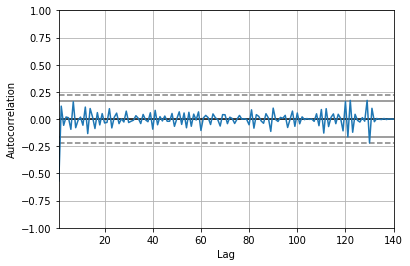

In [283]:
def difference(dataset, interval = 1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i]-dataset[i-interval]
        diff.append(value)
    return np.array(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    #yhat = np.exp(yhat)
    return yhat + history[-1]


days = 26
from statsmodels.tsa.arima.model import ARIMA
#from statsmodels.tsa.arima.model import s

proj = {}
for s in states:
    a = statesdata[s]
    a = a.reset_index()
    confirmed = a['Confirmed']
    deaths = a['Deaths']
    
    X = confirmed.values
    differencedC = difference(X, 2)

    #modelC = 
    modelC = ARIMA(X, order=(5,2,3))
    model_fitC = modelC.fit()
    start = len(X)
    forecastC = model_fitC.predict(start = start, end = start + days)
#     print(model_fit.summary())
    
#     predictionC = []
#     history = [x for x in X]
#     #print(history[-1])
#     day = 1
#     for yhat in forecastC:
#         inverted = inverse_difference(history, yhat, 1)
#         predictionC.append(inverted)
# #         print('Day', day,':', math.exp(inverted))
#         history.append(inverted)
#         day+=1
        
    Y= deaths.values
    differencedD = difference(Y, 2)

    modelD = ARIMA(Y, order=(5,2,3))
    model_fitD = modelD.fit()
    start = len(Y)
    forecastD = model_fitD.predict(start = start, end = start + days)
#     print(model_fit.summary())
    
#     predictionD = []
#     history = [y for y in Y]
#     #print(history[-1])
#     day = 1
#     for yhat in forecastD:
#         inverted = inverse_difference(history, yhat, 1)
#         predictionD.append(inverted)
# #         print('Day', day,':', math.exp(inverted))
#         history.append(inverted)
#         day+=1
    
    df = {'Confirmed': forecastC, 'Deaths': forecastD}
    
    proj[s] = pd.DataFrame(df)
    
# for t in range(len(confirmed_test)):
#     model = ARIMA(history, order=(5,1,0))
#     model_fit = model.fit()
#     output = model_fit.forecast()
#     y = output
#     predictions.append(y)
#     #obs = confirmed_test[t]

    

/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maxi

/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/l

In [284]:
order = test.loc[0:49,'Province_State']
test

# format submission
conf = []
dead = []
fid = 0
for i in range(days):
    for j in order:
        projection = proj[j].iloc[i]
        #print(j, 'day', i)
        conf.append(int(projection['Confirmed']))
        dead.append(int(projection['Deaths']))
        #print(fid)
        fid+=1
    
    

Alabama day 0
0
Alaska day 0
1
Arizona day 0
2
Arkansas day 0
3
California day 0
4
Colorado day 0
5
Connecticut day 0
6
Delaware day 0
7
Florida day 0
8
Georgia day 0
9
Hawaii day 0
10
Idaho day 0
11
Illinois day 0
12
Indiana day 0
13
Iowa day 0
14
Kansas day 0
15
Kentucky day 0
16
Louisiana day 0
17
Maine day 0
18
Maryland day 0
19
Massachusetts day 0
20
Michigan day 0
21
Minnesota day 0
22
Mississippi day 0
23
Missouri day 0
24
Montana day 0
25
Nebraska day 0
26
Nevada day 0
27
New Hampshire day 0
28
New Jersey day 0
29
New Mexico day 0
30
New York day 0
31
North Carolina day 0
32
North Dakota day 0
33
Ohio day 0
34
Oklahoma day 0
35
Oregon day 0
36
Pennsylvania day 0
37
Rhode Island day 0
38
South Carolina day 0
39
South Dakota day 0
40
Tennessee day 0
41
Texas day 0
42
Utah day 0
43
Vermont day 0
44
Virginia day 0
45
Washington day 0
46
West Virginia day 0
47
Wisconsin day 0
48
Wyoming day 0
49
Alabama day 1
50
Alaska day 1
51
Arizona day 1
52
Arkansas day 1
53
California day 1
54


Indiana day 9
463
Iowa day 9
464
Kansas day 9
465
Kentucky day 9
466
Louisiana day 9
467
Maine day 9
468
Maryland day 9
469
Massachusetts day 9
470
Michigan day 9
471
Minnesota day 9
472
Mississippi day 9
473
Missouri day 9
474
Montana day 9
475
Nebraska day 9
476
Nevada day 9
477
New Hampshire day 9
478
New Jersey day 9
479
New Mexico day 9
480
New York day 9
481
North Carolina day 9
482
North Dakota day 9
483
Ohio day 9
484
Oklahoma day 9
485
Oregon day 9
486
Pennsylvania day 9
487
Rhode Island day 9
488
South Carolina day 9
489
South Dakota day 9
490
Tennessee day 9
491
Texas day 9
492
Utah day 9
493
Vermont day 9
494
Virginia day 9
495
Washington day 9
496
West Virginia day 9
497
Wisconsin day 9
498
Wyoming day 9
499
Alabama day 10
500
Alaska day 10
501
Arizona day 10
502
Arkansas day 10
503
California day 10
504
Colorado day 10
505
Connecticut day 10
506
Delaware day 10
507
Florida day 10
508
Georgia day 10
509
Hawaii day 10
510
Idaho day 10
511
Illinois day 10
512
Indiana day 10


962
Indiana day 19
963
Iowa day 19
964
Kansas day 19
965
Kentucky day 19
966
Louisiana day 19
967
Maine day 19
968
Maryland day 19
969
Massachusetts day 19
970
Michigan day 19
971
Minnesota day 19
972
Mississippi day 19
973
Missouri day 19
974
Montana day 19
975
Nebraska day 19
976
Nevada day 19
977
New Hampshire day 19
978
New Jersey day 19
979
New Mexico day 19
980
New York day 19
981
North Carolina day 19
982
North Dakota day 19
983
Ohio day 19
984
Oklahoma day 19
985
Oregon day 19
986
Pennsylvania day 19
987
Rhode Island day 19
988
South Carolina day 19
989
South Dakota day 19
990
Tennessee day 19
991
Texas day 19
992
Utah day 19
993
Vermont day 19
994
Virginia day 19
995
Washington day 19
996
West Virginia day 19
997
Wisconsin day 19
998
Wyoming day 19
999
Alabama day 20
1000
Alaska day 20
1001
Arizona day 20
1002
Arkansas day 20
1003
California day 20
1004
Colorado day 20
1005
Connecticut day 20
1006
Delaware day 20
1007
Florida day 20
1008
Georgia day 20
1009
Hawaii day 20
1010


In [285]:
test['Confirmed'] = conf
test['Deaths'] = dead

index        0.918346
Confirmed    0.019702
Deaths       0.030000
dtype: float64

In [289]:
submission = test.drop(columns=['Province_State', 'Date'])
submission

,ForecastID,Confirmed,Deaths
0,0,127516,2194
1,1,5315,37
2,2,202326,5065
3,3,61703,812
4,4,718134,13142
...,...,...,...
1295,1295,146220,2910
1296,1296,87403,2101
1297,1297,14167,313
1298,1298,92762,1270


In [290]:
#submission.to_csv('team31-dec3-1.csv', index = False, header = True)